## 人脸识别
1. 人脸有不同的颜色组成
2. 不同的颜色由三原色：红绿蓝组成
3. 红绿蓝由0~255的数字组成

### 所以人脸是由数据组成的

### 使用matplotlib.pyplot导入数据图片并显示,观察这张图片的数据类型

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC

from sklearn.decomposition import PCA

# 删选合适的参数
from sklearn.model_selection import GridSearchCV

import sklearn.datasets as datasets

import logging

## 进行人脸识别操作
1.导入相应模块工具：GridSearchCV、fetch_lfw_people、PCA、loggin等  


2.设置logging，控制台显示程序处理数据的进度  


3.使用fetch_lfw_people导入数据，如果本地没有会从网络下载，如果本地有数据，加载本地  


4.查看人脸数据结构  


5.从人脸数据中提取进行机器学习的关键数据  


6.对数据进行分割，获取训练数据和测试数据  


7.数据太复杂了，使用PCA对数据进行降维处理，去除一些不重要的数据  


8.使用GridSerchCV查询最佳的机器学习模型  


9.定义方法获取预测人名和真实人名  


10.定义方法绘制人脸识别结果图形  


11.调用方法进行数据展示  


导入相应模块工具：GridSearchCV、fetch_lfw_people、PCA、logging等 

设置logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')  
控制台输出记录数据，显示程序处理数据的进度

In [2]:
# Info warning error……
logging.basicConfig(level = logging.INFO,format = '%(asctime)s%(message)s')

In [3]:
# lfw label face wild
faces = datasets.fetch_lfw_people(resize = 1,min_faces_per_person=70)
faces

{'data': array([[253.66667 , 253.66667 , 254.66667 , ...,  86.666664,  86.333336,
          86.333336],
        [ 42.      ,  34.      ,  31.666666, ..., 121.666664, 148.      ,
         185.33333 ],
        [ 94.      ,  72.      ,  74.      , ..., 182.66667 , 183.      ,
         182.33333 ],
        ...,
        [ 84.333336,  86.      ,  85.333336, ...,  44.      ,  35.666668,
          30.333334],
        [ 49.666668,  50.333332,  47.666668, ..., 178.66667 , 167.66667 ,
         127.333336],
        [ 31.333334,  33.333332,  26.666666, ...,  47.666668,  63.      ,
          99.      ]], dtype=float32),
 'images': array([[[253.66667 , 253.66667 , 254.66667 , ...,  42.333332,
           37.666668,  39.      ],
         [254.      , 254.      , 253.66667 , ...,  43.333332,
           38.      ,  39.      ],
         [254.66667 , 254.33333 , 253.33333 , ...,  44.      ,
           38.666668,  38.      ],
         ...,
         [ 68.333336,  63.333332,  51.      , ...,  90.333336,
     

In [4]:
faces['images'].shape

(1288, 125, 94)

In [5]:
faces['target_names']

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

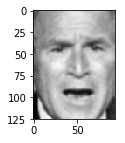

In [6]:
index= np.random.randint(1288,size = 1)[0]

plt.figure(figsize=(2,2))

plt.imshow(faces['images'][index],cmap = 'gray')

使用fetch_lfw_people导入数据，如果本地没有会从网络下载，如果本地有数据，加载本地

In [7]:
faces['images'].shape
# 125人脸高度，宽度94

(1288, 125, 94)

查看人脸数据结构

In [8]:
# shape(125,94)
X = faces['data']

y = faces['target']

target_names = faces['target_names']

从人脸数据中提取进行机器学习的关键数据

In [9]:
X

array([[253.66667 , 253.66667 , 254.66667 , ...,  86.666664,  86.333336,
         86.333336],
       [ 42.      ,  34.      ,  31.666666, ..., 121.666664, 148.      ,
        185.33333 ],
       [ 94.      ,  72.      ,  74.      , ..., 182.66667 , 183.      ,
        182.33333 ],
       ...,
       [ 84.333336,  86.      ,  85.333336, ...,  44.      ,  35.666668,
         30.333334],
       [ 49.666668,  50.333332,  47.666668, ..., 178.66667 , 167.66667 ,
        127.333336],
       [ 31.333334,  33.333332,  26.666666, ...,  47.666668,  63.      ,
         99.      ]], dtype=float32)

In [10]:
X.shape
# 取出来比较重要的300个特征
# 数据的特征值，计算
# 100,99，……0.1,0.01，0.0001
# 特征权重90%
# 累加和
# np.cumsum()/np.sum() > 0.9

(1288, 11750)

# PCA 降维
主成分分析（Principal Components Analysis），简称PCA，是一种数据降维技术，用于数据预处理。一般我们获取的原始数据维度都很高，比如1000个特征，在这1000个特征中可能包含了很多无用的信息或者噪声，真正有用的特征才100个，那么我们可以运用PCA算法将1000个特征降到100个特征。这样不仅可以去除无用的噪声，还能减少很大的计算量。
原始数据集dataMat 行代表样本,列代表特征  
1)零均值化,行代表样本,列代表特征,
零均值化就是求每一列的平均值,然后该列上的所有数都减去这个均值  
menaVal = np.mean(dataMat,axis = 0)#按列求均值,即求各个特征的均值  
newData = dataMat - meanVal  
2)求协方差矩阵  
covMat = np.cov(newData,rowvar = 0)  
rowvar = 0 传入的数据一行代表一份样本  
若非0 说明传入的数据一列代表一个样本  
3)求特征值,特征矩阵  
eigVals,eigVects = np.linalg.eig(covMat)  
eigVals存放特征值,行向量  
eigVects 存放特征向量,每一列代表一个特征向量  
特征值和特征向量是一一对应的  
4)保留主要成分[即保留值比较大的前n个特征]  
    -第三步得到的特征值向量eigVals,对其从小到大排序,np.argsort(eigVals)  
    -取出排在前面最大的n个特征向量(根据下标取),  
     它们组成了一个新的特征空间的一组基n_eigVect.  
    -将零均值化后的数据乘以n_eigVect就可以得到降维后的数据lowDDataMat  
    -重构数据:乘以n_eigVect的转置矩阵,再加上均值meanVal  
    (eigValIndice=np.argsort(eigVals)            #对特征值从小到大排序    
     n_eigValIndice=eigValIndice[-1:-(n+1):-1]   #最大的n个特征值的下标    
     n_eigVect=eigVects[:,n_eigValIndice]      #最大的n个特征值对应的特征向量     
     lowDDataMat=newData*n_eigVect               #低维特征空间的数据    
     reconMat=(lowDDataMat*n_eigVect.T)+meanVal  #重构数据  )  
*)如何选择主成分个数,降到几维数据,即n取多少合适,    
    一般通过方差百分比实现.(特征值从大到小排列,前n个求和/总和 >0.99)    
    (def percentage2n(eigVals,percentage):    
    sortArray=np.sort(eigVals)   #升序    
    sortArray=sortArray[-1::-1]  #逆转，即降序    
    arraySum=sum(sortArray)    
    tmpSum=0    
    num=0    
    for i in sortArray:    
        tmpSum+=i    
        num+=1    
        if tmpSum>=arraySum*percentage:    
            return num )  

In [11]:
face = faces['data']
face


array([[253.66667 , 253.66667 , 254.66667 , ...,  86.666664,  86.333336,
         86.333336],
       [ 42.      ,  34.      ,  31.666666, ..., 121.666664, 148.      ,
        185.33333 ],
       [ 94.      ,  72.      ,  74.      , ..., 182.66667 , 183.      ,
        182.33333 ],
       ...,
       [ 84.333336,  86.      ,  85.333336, ...,  44.      ,  35.666668,
         30.333334],
       [ 49.666668,  50.333332,  47.666668, ..., 178.66667 , 167.66667 ,
        127.333336],
       [ 31.333334,  33.333332,  26.666666, ...,  47.666668,  63.      ,
         99.      ]], dtype=float32)

In [12]:
B1 = face - face.mean(axis = 0) 

In [13]:
C1 = np.cov(B1,rowvar=False)
C1.shape
C1

array([[2337.77429704, 2283.15379912, 2157.88945878, ..., -173.98580544,
        -180.65598369, -155.37994157],
       [2283.15379912, 2305.04711003, 2232.11163363, ..., -163.02157565,
        -172.52015594, -149.54820661],
       [2157.88945878, 2232.11163363, 2246.66371623, ..., -128.19750738,
        -145.45911915, -130.66836321],
       ...,
       [-173.98580544, -163.02157565, -128.19750738, ..., 6510.35590511,
        6346.20335607, 5959.19476803],
       [-180.65598369, -172.52015594, -145.45911915, ..., 6346.20335607,
        6475.00227319, 6286.05121311],
       [-155.37994157, -149.54820661, -130.66836321, ..., 5959.19476803,
        6286.05121311, 6400.02973382]])

In [14]:
np.linalg.eigvals(C1)

array([ 3.10114833e+06+0.j,  2.48501420e+06+0.j,  1.20797292e+06+0.j, ...,
        1.63489725e-13+0.j,  1.79980929e-13+0.j, -1.06531578e-13+0.j])

In [15]:
eigVals,eigVects  = np.linalg.eig(C1)

In [17]:
eigVals = np.sort(eigVals)

In [18]:
def percentage2n(eigVals,percentage):
    sortArray = np.sort(eigVals) #升序
    sortArray = sortArray[-1::-1] #逆转，即降序
    arraySum = sum(sortArray)
    tmpSum = 0
    num = 0
    for i in sortArray:
        tmpSum += i
        num += 1
        if tmpSum >= arraySum*percentage:
            return num

In [19]:
n = percentage2n(eigVals,0.99)  # 要达到percent 的方差百分比,需要前n个特征向量
n

579

In [20]:
eigValIndice = np.argsort(eigVals) # 对特征值从小到大排序
eigValIndice.shape 

(11750,)

In [23]:
B1.shape


(1288, 11750)

In [24]:
n_eigVect.shape

(11750, 579)

In [25]:
n_eigValIndice = eigValIndice[-1:-(n+1):-1] # 最大的n个特征值的下标
n_eigVect = eigVects[:,n_eigValIndice] # 最大的n个特征值对应的特征向量

In [28]:

# lowDDataMat = B1*n_eigVect # 低维特征空间的数据 零均值后的数据*最大的n个特征向量
# reconMat = (lowDDataMat*n_eigVect.T) + meanVal # 重构数据 低维数据乘以n_eigVect的转置矩阵,再加上均值meanVal 
# reconMat


In [ ]:
eigVects[::54]

In [ ]:
iris = datasets.load_iris()['data']
iris

In [ ]:
iris.mean(axis = 0)

In [ ]:
B = iris - iris.mean(axis = 0)

In [ ]:
# 求解协方差
C = np.cov(B,rowvar=False)
C.shape
C

In [ ]:
np.linalg.eigvals(C)

In [ ]:
T,T_ = np.linalg.eig(C)

In [ ]:
T,T_ = np.linalg.eig(C)

In [ ]:
T_[:,:2]

In [ ]:
D = iris.dot(T_[:,:2])

In [ ]:
pca = PCA(2)
pca.fit_transform(iris)
pca.get_covariance()

In [ ]:
pca.explained_variance_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.get_precision()

In [ ]:
D - D.mean(axis = 0)/D.std(axis = 0)

In [ ]:
np.linalg.eigh(C)

In [ ]:
np.linalg.eigvalsh(C)

分割训练数据和预测数据

使用PCA进行降维

In [29]:
pca = PCA(n_components=579,whiten=True)

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=579, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [30]:
X_pca = pca.transform(X)
X_pca.shape

(1288, 579)

In [31]:
# 约等于0
X_pca.mean(axis = 0)

array([ 2.03063024e-07,  8.54155857e-08, -3.16533999e-08,  3.25789351e-08,
        1.10601786e-08,  1.65856406e-07,  2.27219573e-07,  6.97068913e-07,
        9.01821053e-08,  1.66666254e-07, -3.22781375e-08,  4.38705001e-08,
        1.61321267e-07, -5.80358574e-07,  3.48615430e-07, -1.99615400e-07,
       -3.85856765e-07, -1.59423919e-07,  6.45678426e-08,  5.86788190e-07,
        3.15006844e-07, -4.80539313e-07, -4.83593565e-09,  1.51510562e-07,
       -3.85046917e-07, -2.04821546e-07, -3.93353616e-08, -2.85227657e-07,
        5.09647464e-07, -6.41941540e-07,  7.08036509e-08,  2.68521688e-07,
       -8.51957722e-08, -4.43425250e-07,  2.82890682e-07,  4.71897096e-07,
        4.35049117e-07, -3.84792401e-07,  6.92765184e-07,  1.68679293e-08,
       -5.43082535e-07, -1.39941335e-07, -6.53105872e-07,  1.32259373e-07,
        9.26347809e-07, -2.74190626e-09,  7.23536402e-07,  4.06542540e-07,
        9.98794349e-07, -4.87527132e-07,  4.41018841e-07, -1.61969140e-08,
       -1.32416790e-06, -

In [32]:
# 方差等于1
X_pca.std(axis = 0)
# 归一化后结果
# (X - min)/(max - min)

# (X - mean)/std

array([0.999612  , 0.99961245, 0.99961215, 0.99961245, 0.99961233,
       0.99961126, 0.9996134 , 0.9996124 , 0.9996116 , 0.99961156,
       0.9996125 , 0.9996125 , 0.9996114 , 0.9996118 , 0.9996119 ,
       0.99961144, 0.99961203, 0.99961156, 0.99961156, 0.99961185,
       0.9996118 , 0.9996124 , 0.999613  , 0.99961144, 0.9996129 ,
       0.9996121 , 0.999612  , 0.99961126, 0.99961174, 0.9996114 ,
       0.99961144, 0.9996113 , 0.9996118 , 0.9996109 , 0.99961233,
       0.99961114, 0.99961174, 0.9996116 , 0.99961156, 0.99961245,
       0.99961174, 0.99961185, 0.99961203, 0.9996115 , 0.9996123 ,
       0.9996121 , 0.9996121 , 0.9996122 , 0.9996121 , 0.9996123 ,
       0.9996123 , 0.99961174, 0.99961203, 0.99961257, 0.9996117 ,
       0.9996123 , 0.9996119 , 0.9996121 , 0.9996122 , 0.999612  ,
       0.99961156, 0.999612  , 0.99961233, 0.9996116 , 0.9996123 ,
       0.9996111 , 0.9996109 , 0.9996117 , 0.99961156, 0.99961114,
       0.99961174, 0.99961215, 0.99961203, 0.99961144, 0.99961

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# X_train,X_test,画图方便保留的数据
X_train,X_test,X_train_pca,X_test_pca,y_train,y_test = train_test_split(X,X_pca,y,test_size = 0.2)

使用GridSearchCV我们找到了最佳的支持向量机方法

In [35]:
C = [0.001,0.1,1,5,10]
'''gamma : float, optional (default='auto')
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    If gamma is 'auto' then 1/n_features will be used instead.'''
# X_pca 特征300  1/300 = 0.0033
gamma = [0.0001,0.0002,0.0033,0.01,0.1]
# 5 * 5 = 25
svc = SVC()

# 交叉验证，可以将参数交叉，验证
gcv = GridSearchCV(svc,param_grid={'C':C,'gamma':gamma})

In [36]:
%time gcv.fit(X_train_pca,y_train)

Wall time: 1min 32s


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.1, 1, 5, 10], 'gamma': [0.0001, 0.0002, 0.0033, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
gcv.best_params_

{'C': 10, 'gamma': 0.0002}

In [38]:
gcv.best_score_

0.5844660194174758

进行数据预测

In [39]:
y_ = gcv.predict(X_test_pca)
y_

array([3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 6, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 5, 3, 3, 5, 3, 1, 1, 6, 3, 3, 3, 3, 4, 2, 1, 3,
       3, 3, 3, 3, 3, 3, 6, 1, 6, 2, 3, 1, 1, 3, 3, 6, 1, 3, 1, 3, 4, 3,
       0, 1, 3, 3, 3, 3, 3, 3, 1, 3, 4, 3, 4, 3, 3, 3, 1, 1, 1, 3, 3, 1,
       3, 3, 3, 3, 3, 2, 4, 6, 1, 3, 3, 3, 3, 5, 3, 3, 2, 4, 1, 3, 1, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 5, 0, 4, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 6, 3, 3, 3, 5, 1, 3, 1, 4, 1, 4, 1, 1, 2, 1, 3, 1, 2, 3, 6, 3,
       3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 4, 6, 3, 3, 6, 1,
       5, 6, 1, 3, 6, 4, 4, 3, 3, 1, 3, 1, 3, 6, 0, 3, 3, 3, 1, 6, 3, 5,
       6, 1, 3, 3, 3, 0, 1, 2, 3, 3, 0, 3, 3, 3, 3, 1, 3, 3, 2, 3, 2, 3,
       3, 1, 5, 3, 1, 1, 3, 3, 3, 4, 1, 2, 6, 2, 3, 0, 3, 6, 1, 3, 1, 3,
       3, 3, 3, 1, 3, 3, 6, 3, 3, 3, 3, 3, 3, 4, 3, 2], dtype=int64)

In [40]:
gcv.score(X_test_pca,y_test)

0.7131782945736435

定义方法获取预测人名和真实人名 

调用方法获取人脸预测的名字，以及人脸的真实名字

定义方法绘制人脸识别结果图形

In [41]:
# 将算法预测的结果显示一下，100张图片
X_test_pca.shape

(258, 579)

In [42]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

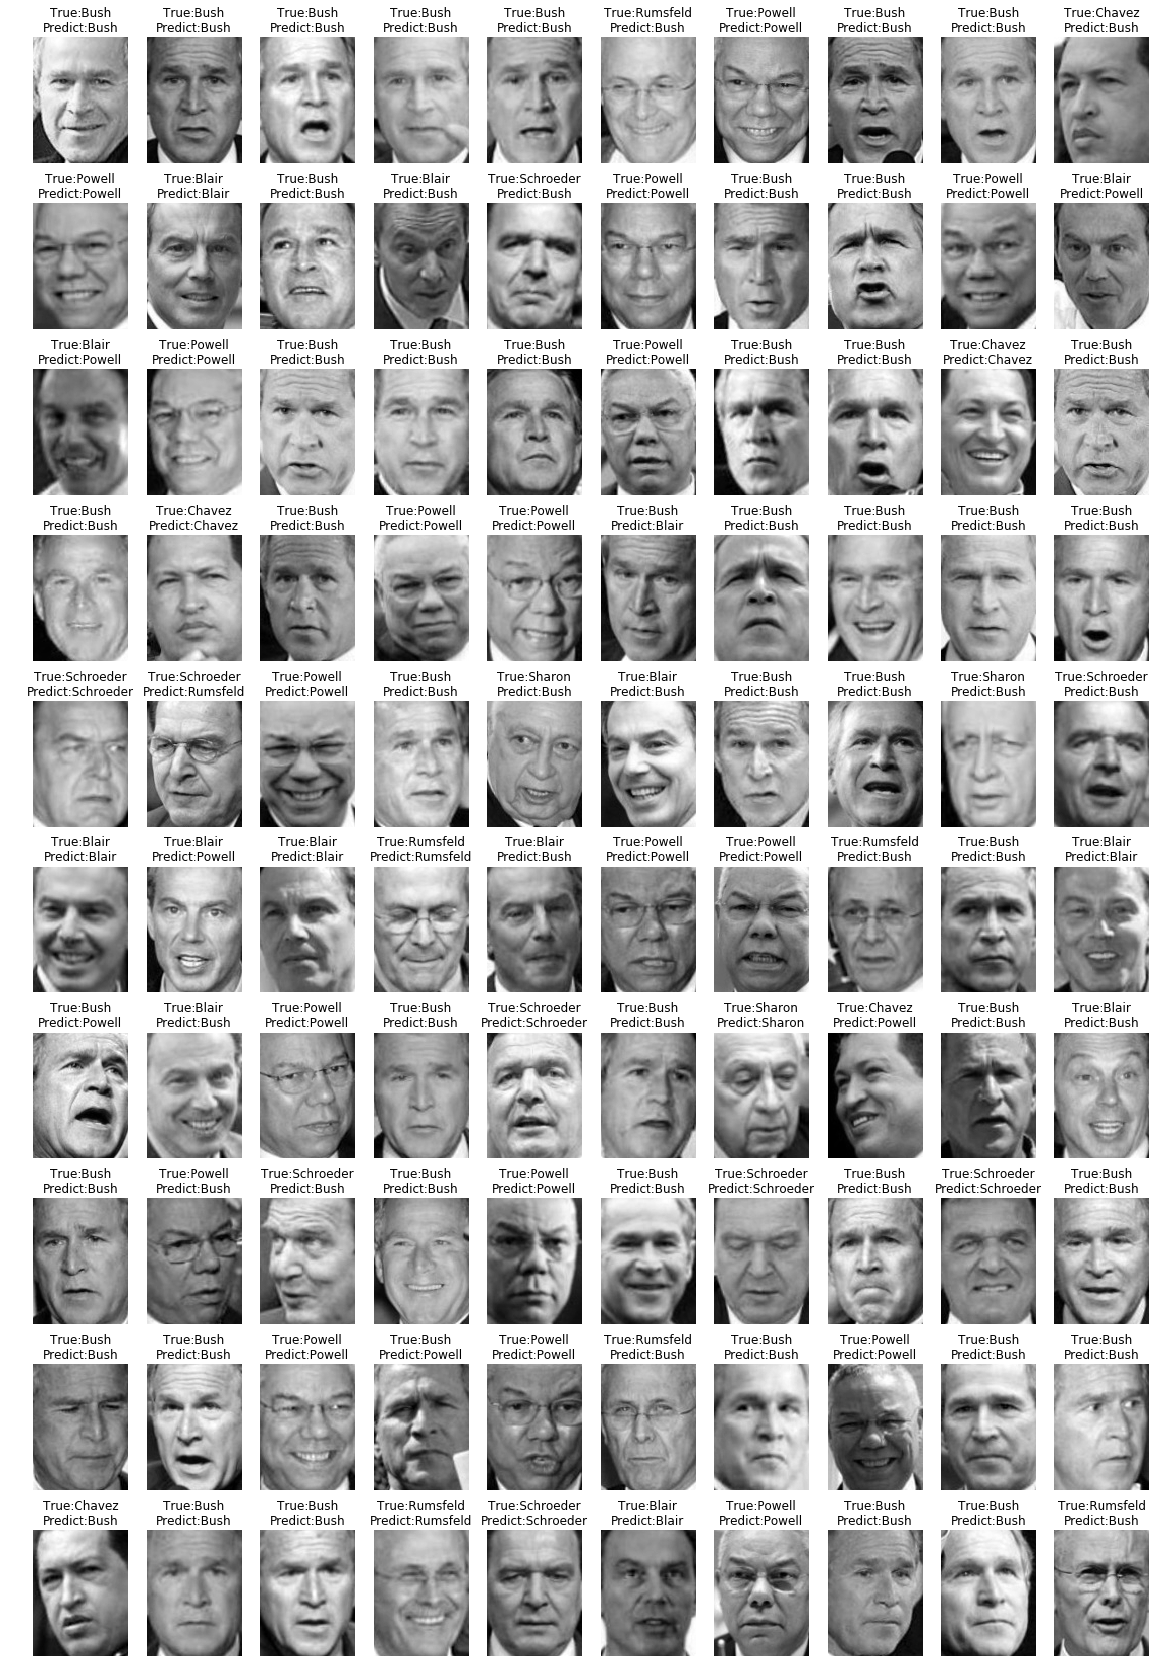

In [43]:
plt.figure(figsize=(10*2,10*3))
for i in range(100):
    
    axes = plt.subplot(10,10,i+1)
#     X_test_pca -------> X_test一一对应的
    axes.imshow(X_test[i].reshape(125,94),cmap = 'gray')
    axes.axis('off')
    
#     t真实数据 y_test

    t = target_names[y_test[i]].split(' ')[-1]
    
#     p算法预测的数据y_
    p = target_names[y_[i]].split(' ')[-1]
    axes.set_title('True:%s\nPredict:%s'%(t,p))

In [44]:
# 样本是否均衡
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [45]:
for i in range(7):
    count = (y_train == i).sum()
    print(target_names[i],count)

Ariel Sharon 61
Colin Powell 187
Donald Rumsfeld 99
George W Bush 431
Gerhard Schroeder 86
Hugo Chavez 54
Tony Blair 112


In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smote = SMOTE()

smote.fit(X_train_pca,y_train)

SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)

In [48]:
# smote 均衡的时候，应该对人脸数据进行均衡
# 不是对降维之后的数据进行均衡
X_train_pca2,y_train2 = smote.sample(X_train_pca,y_train)

In [49]:
for i in range(7):
    count = (y_train2 == i).sum()
    print(target_names[i],count)

Ariel Sharon 431
Colin Powell 431
Donald Rumsfeld 431
George W Bush 431
Gerhard Schroeder 431
Hugo Chavez 431
Tony Blair 431


In [50]:
svc = SVC()

gcv = GridSearchCV(svc,param_grid={'C':[0.0001,0.01,0.1,1,10],'gamma':[0.0001,0.001,0.0033,0.01,0.1]})

%time gcv.fit(X_train_pca2,y_train2)

Wall time: 11min 46s


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.01, 0.1, 1, 10], 'gamma': [0.0001, 0.001, 0.0033, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
gcv.best_params_

{'C': 10, 'gamma': 0.001}

In [52]:
gcv.best_score_

0.9516075571760026

In [53]:
y_ = gcv.predict(X_test_pca)

In [54]:
gcv.score(X_test_pca,y_test)

0.6317829457364341

In [55]:
X.shape

(1288, 11750)

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [57]:
for i in range(7):
    
    print(target_names[i],(y_train == i).sum())

Ariel Sharon 63
Colin Powell 186
Donald Rumsfeld 98
George W Bush 419
Gerhard Schroeder 89
Hugo Chavez 55
Tony Blair 120


In [58]:
smote = SMOTE()

X_train2,y_train2 = smote.fit_sample(X_train,y_train)

In [59]:
X_train2.shape

(2933, 11750)

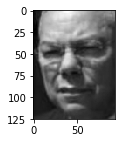

In [60]:
index = np.random.randint(3017,size = 1)[0]

img = X_train2[index].reshape(125,94)

plt.figure(figsize=(2,2))
plt.imshow(img,cmap = 'gray')

In [61]:
for i in range(7):
    
    print(target_names[i],(y_train2 == i).sum())

Ariel Sharon 419
Colin Powell 419
Donald Rumsfeld 419
George W Bush 419
Gerhard Schroeder 419
Hugo Chavez 419
Tony Blair 419


In [62]:
# X_train2,y_train2,作为训练数据
X_train2.shape

(2933, 11750)

In [63]:
pca = PCA(300,whiten=True)

pca.fit(X_train2)

X_train2_pca = pca.transform(X_train2)

In [64]:
svc = SVC(C = 10,gamma=0.001)

svc.fit(X_train2_pca,y_train2)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
# 预测
X_test.shape

(258, 11750)

In [66]:
X_test_pca = pca.transform(X_test)

svc.score(X_test_pca,y_test)

0.8023255813953488

In [67]:
y_train

array([6, 6, 6, ..., 3, 0, 1], dtype=int64)

In [68]:
# SMOTE K近邻算法，创造人脸，算出来的，难免模糊


# 直接复制成431
for i in range(7):
    print(target_names[i],(y_train == i).sum())

Ariel Sharon 63
Colin Powell 186
Donald Rumsfeld 98
George W Bush 419
Gerhard Schroeder 89
Hugo Chavez 55
Tony Blair 120


In [69]:
cond = np.argwhere(y_train == 0).reshape(-1)

sharon = X_train[cond]

np.concatenate([sharon,sharon,sharon,sharon])

array([[203.      , 203.      , 204.      , ...,  96.333336,  59.      ,
         35.666668],
       [183.      , 177.      , 170.      , ..., 104.      , 127.666664,
        153.33333 ],
       [ 58.      ,  59.      ,  61.666668, ..., 152.      , 155.33333 ,
        160.66667 ],
       ...,
       [ 88.666664, 101.333336, 104.333336, ...,  19.666666,  18.333334,
         17.      ],
       [126.      , 126.      , 123.666664, ..., 122.666664,  49.666668,
         33.333332],
       [146.      , 135.66667 , 127.      , ..., 245.      , 249.33333 ,
        250.66667 ]], dtype=float32)

In [70]:
56*7

392

In [71]:
431//56 +1

8

In [72]:
type(X_train)

numpy.ndarray

In [73]:
a = np.array([2,8])

In [74]:
np.concatenate([a]*3)

array([2, 8, 2, 8, 2, 8])

In [75]:
cond = np.argwhere(y_train == 0).ravel()

df = X_train[cond]
df.shape

(63, 11750)

In [76]:
result_data = []
result_label = []
for i in range(7):
    
    cond = np.argwhere(y_train == i).ravel()
    
    df = X_train[cond]
    
    df2 = y_train[cond]
    
    s = df.shape[0]
    c = 431//s + 1
    ret = np.concatenate([df]*c)[:431]
    ret2 = np.concatenate([df2]*c)[:431]
    result_data.append(ret)
    result_label.append(ret2)

In [77]:
len(result_data[4])

431

In [78]:
len(result_label[0])

431

In [79]:
X_train3 = np.concatenate([result_data[0],result_data[1],result_data[2],result_data[3],result_data[4],result_data[5],result_data[6]])

In [80]:
y_train3 = np.concatenate([result_label[0],result_label[1],result_label[2],result_label[3],result_label[4],result_label[5],result_label[6]])

In [81]:
for i in range(7):
    print(target_names[i],(y_train3 == i).sum())

Ariel Sharon 431
Colin Powell 431
Donald Rumsfeld 431
George W Bush 431
Gerhard Schroeder 431
Hugo Chavez 431
Tony Blair 431


In [82]:
pca = PCA(300,whiten=True)

In [83]:
# 测试数据X_test

In [84]:
pca.fit(np.concatenate([X_train3,X_test]))

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [85]:
X_train3_pca = pca.transform(X_train3)

X_test_pca = pca.transform(X_test)

In [86]:
svc = SVC(C = 10,gamma=0.001)

svc.fit(X_train3_pca,y_train3)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
svc.score(X_test_pca,y_test)

0.7984496124031008

调用方法，显示数据

网络上查找图片使用机器学习模型进行预测

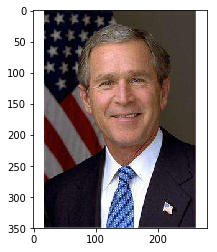

In [88]:
# 从网络下载图片
bush = plt.imread('bush.jpg')
plt.imshow(bush)

读取网络数据进行灰度处理gray = [0.299,0.587,0.114]  
如果是jpg图片进行归一化操作

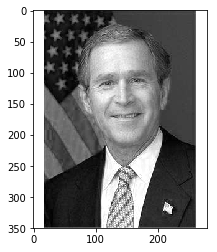

In [89]:
bush2 = bush.max(-1)
plt.imshow(bush2,cmap='gray')

如果图片尺寸不符合要求，那么修改尺寸

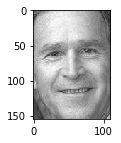

In [90]:
plt.figure(figsize=(2,2))
bush3 = bush2[55:210,90:200]
plt.imshow(bush3,cmap='gray')

In [91]:
bush3.shape

(155, 110)

In [92]:
from scipy import  ndimage as ndimage

D:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


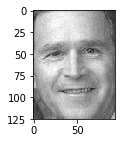

In [93]:
plt.figure(figsize=(2,2))
bush4 = ndimage.zoom(bush3,zoom = [125/155,94/110])
plt.imshow(bush4,cmap='gray')

In [94]:
X_test = bush4.reshape(1,-1)
X_test_pca = pca.transform(X_test)
svc.predict(X_test_pca)

array([6], dtype=int64)

In [95]:
target_names[6]

'Tony Blair'